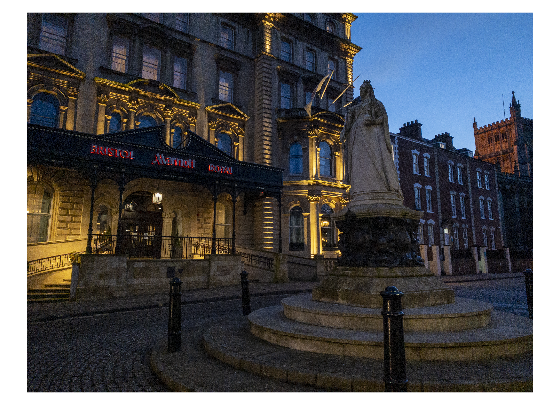

In [2]:
% Read noisy image
img_orig = imread('Bristol.png');
imshow(img_orig)

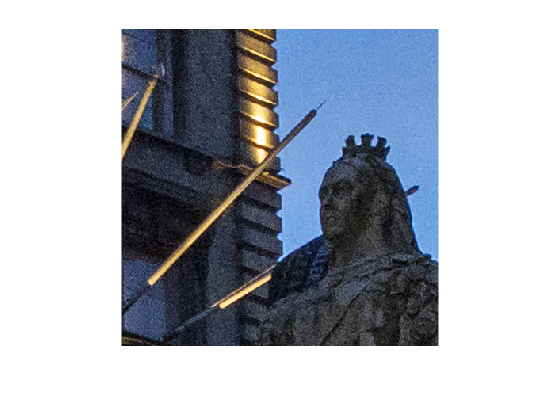

In [3]:
% Crop for speed and visualisation
img = img_orig(400+(1:400),2400+(1:400),:);
imshow(img)

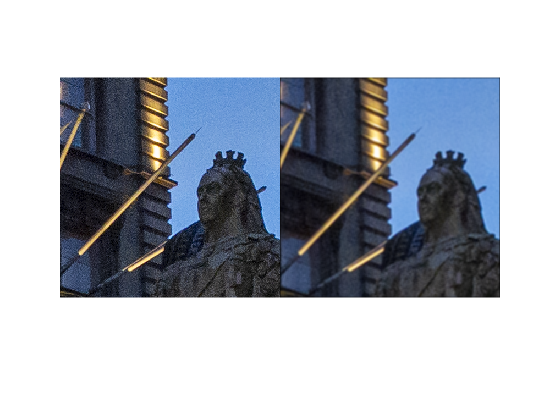

In [4]:
% Mean filter with size of nxn pixels - change n to see the effect
n = 5;
kernel = ones(n,n)/(n*n);
denoise_avgfilt = imfilter(img,kernel);
figure; imshow([img denoise_avgfilt]); 

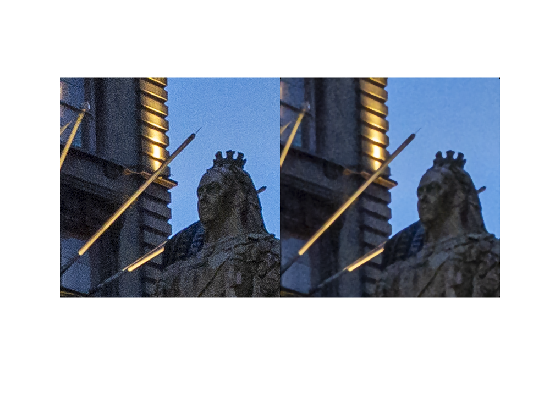

In [5]:
% Median filter with size of nxn pixels - change n to see the effect
n = 5;
denoise_medfilt = img;
for ch = 1:3
    denoise_medfilt(:,:,ch) = medfilt2(img(:,:,ch),[n n]);
end
imshow([img denoise_medfilt])

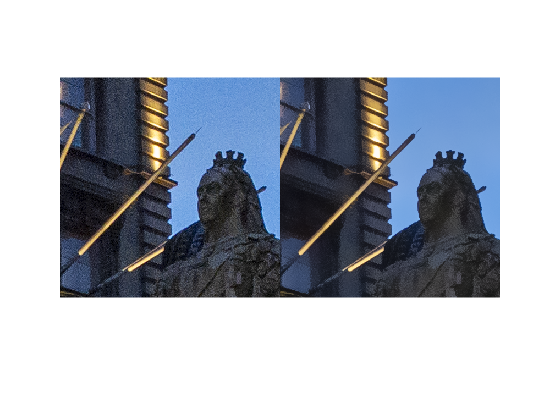

In [6]:
% Bilateral filtering of images with Gaussian kernels
smooth_degree = 50;
sigma_spatial = 10;
% Convert the image to the L*a*b colorspace, so that the bilateral filter smooths perceptually similar colors.
imLAB = rgb2lab(img);
denoise_bifilt = imbilatfilt(imLAB,smooth_degree,sigma_spatial);
denoise_bifilt = lab2rgb(denoise_bifilt,'Out','uint8');
imshow([img denoise_bifilt])

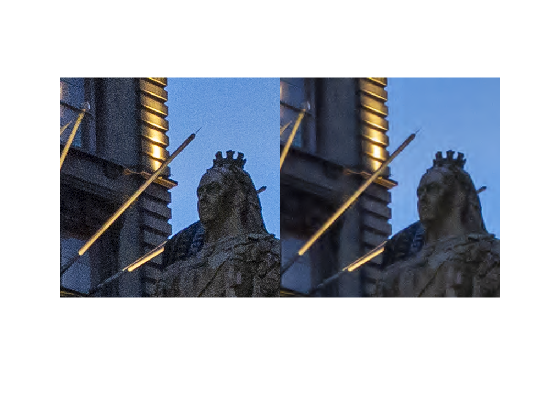

In [7]:
% Wavelet image denoising
wavelet_level = 4;
denoise_wavelet = uint8(wdenoise2(img,wavelet_level,'DenoisingMethod','Minimax','ColorSpace','Original'));
imshow([img denoise_wavelet])

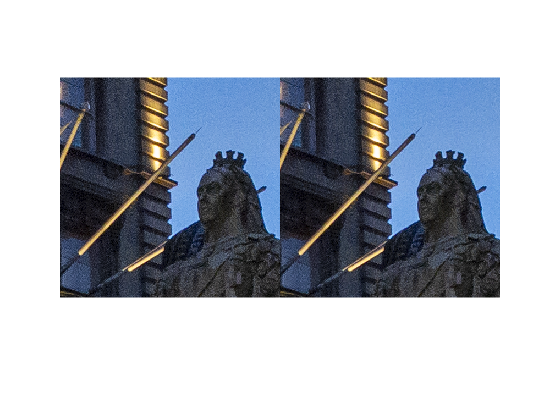

In [8]:
% Denoise image using deep neural network
net = denoisingNetwork('DnCNN');
denoise_dncnn = img;
% convert into YCbCr format as DnCNN model was trained with greyscale image
imgycbcr = rgb2ycbcr(img);
% denoise only brightness (Y) channel
imgycbcr(:,:,1) = denoiseImage(imgycbcr(:,:,1),net);
% convert back to rgb for display
denoise_dncnn = ycbcr2rgb(imgycbcr);
imshow([img denoise_dncnn])

In [9]:
% Image quality matric
cleanImg = imread('testImage1_clean.png');
noisyImg = imread('testImage1_noisy.png');
% compute PSNR score
psnr_noisy = psnr(noisyImg,cleanImg)
% compute SSIM score
ssim_noisy = ssim(rgb2gray(noisyImg), rgb2gray(cleanImg))


psnr_noisy =

   14.8428


ssim_noisy =

    0.3492




psnr_noisy =

   17.3968


ssim_noisy =

    0.5182



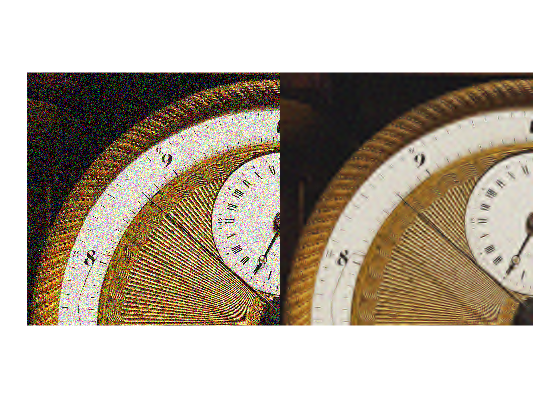

In [10]:
% Wavelet image denoising
wavelet_level = 4;
denoise_wavelet = uint8(wdenoise2(noisyImg,wavelet_level,'DenoisingMethod','Minimax','ColorSpace','Original'));
imshow([noisyImg denoise_wavelet])
% compute PSNR score
psnr_noisy = psnr(denoise_wavelet,cleanImg)
% compute SSIM score
ssim_noisy = ssim(rgb2gray(denoise_wavelet), rgb2gray(cleanImg))